In [23]:
# Hello to the Large Histogram Calculator
# This noteboook is supposed to calculate the histogram of a whole year
#
# It needs to iterate over all 5-minutely files,
# but must not keep all the values in RAM but instead computes a histogram
# with predefined bins for each file.

## Imports
import os
import glob
import numpy as np
import wradlib as wrl
import matplotlib.pyplot as plt

## Constants
bin_file_name_prefix = "raa01-yw2017.002_10000-"
img_file_name_prefix = "scaled_"

data_min = 0
data_max = 5    # Acutally must be determined from data!!!
num_bins = 10

# Subdirectories with years
image_dir="/grossePlatte/Radardaten/PNG/"
data_dir="/grossePlatte/Radardaten/"

month = '08'
year = 2016
year_begin = 2016
year_end   = 2016

In [24]:
def read_data_from_radolan(radfile):
    radfile = wrl.util.get_wradlib_data_file(radfile)
    data, attrs = wrl.io.read_radolan_composite(radfile)
    data = np.ma.masked_equal(data, -9999)
    return data

In [25]:
def get_filename_prefix(year):
    date_string_w_full_year = "{:4d}".format(year)
    return date_string_w_full_year[2:]

In [ ]:
# Must determine (MIN and) MAX of values, to determine bins correctly
for year in range(year_begin, year_end+1):
    print("Parsing year: {}".format(year))
    year_dir = data_dir + str(year) + "/"
    ## Make wradlib stop complaining
    os.environ["WRADLIB_DATA"] = year_dir
    os.chdir(year_dir)

    filename_prefix = bin_file_name_prefix + get_filename_prefix(year)
    for file in glob.glob(filename_prefix + "*"):
        try:
            bin_data = read_data_from_radolan(file)
            bin_data_max = bin_data.max()
            if bin_data_max > data_max:
                data_max = bin_data_max
        except OSError as e:
            print("Could not read file: " + str(e))
print("New Maximum is: {}".format(data_max))

Parsing year: 2016


In [21]:
# Determine bins
bins = np.linspace(data_min, data_max, num_bins)
hist = np.zeros(num_bins - 1, dtype='int16')

year_dir = data_dir + str(year) + "/"
## Make wradlib stop complaining
os.environ["WRADLIB_DATA"] = year_dir
os.chdir(year_dir)

# Compose complete historgram by singele histograms
counter = 0
filename_prefix = bin_file_name_prefix + get_filename_prefix(year)
for file in glob.glob(filename_prefix + month + "*"):
    try:
        bin_data = read_data_from_radolan(file)
        bin_data_hist, _ = np.histogram(bin_data, bins)
        hist += bin_data_hist
        counter += 1
    except OSError as e:
        print("Could not read file: " + str(e))
print("Processed {} files.".format(counter))
print("Number of values: {}".format(np.sum(hist)))

Processed 8928 files.
Number of values: 352733


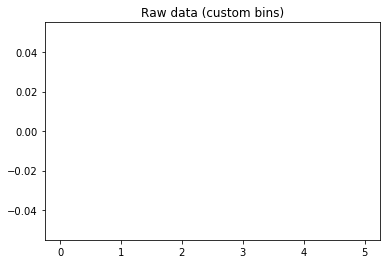

In [22]:
plt.hist(hist, bins=bins)  # arguments are passed to np.histogram
plt.title("Raw data (custom bins)")
plt.show()